In [1]:
def plot_graph_mean_std(data, best_epochs):
    c = ['b','g','c','r','k','y','m']
    c_i=0
    fig1 = plt.figure(figsize=(5, 5))  # ERRROR
    fig2 = plt.figure(figsize=(5, 5))  # ERRROR
    ax11 = fig1.add_subplot(111)
    ax12 = fig2.add_subplot(111)
    fig3 = plt.figure(figsize=(5, 5))  # ACCURACY
    fig4 = plt.figure(figsize=(5, 5))  # ACCURACY
    ax21 = fig3.add_subplot(111)
    ax22 = fig4.add_subplot(111)
    for i in data.keys():
        # plot each data dataset's validation and train
        _data = data[i]
        # plot the accuracy for each layer
        _tr_acc = _data['train_acc']
        _tr_err = _data['train_err']
        _val_acc = _data['val_acc']
        _val_err = _data['val_err']
        _x = np.arange(0, len(_tr_err['mean']))
        ax11.set_xlabel('epoch')
        ax11.set_ylabel('training error')
        ax11.plot(_x, _tr_err['mean'], label=i, c=c[c_i])
        ax11.fill_between(
            _x,
            _tr_err['mean'] - _tr_err['std'],
            _tr_err['mean'] + _tr_err['std'],
            alpha=.3, color=c[c_i])
        ax12.set_ylabel('validation error')
        ax12.set_xlabel('epoch')
        ax12.plot(
            _x, _val_err['mean'], label=i, color=c[c_i])
        ax12.fill_between(
            _x,
            _val_err['mean'] - _val_err['std'],
            _val_err['mean'] + _val_err['std'],
            alpha=.3, color=c[c_i])

        ax21.set_xlabel('epoch')
        ax21.set_ylabel('training accuracy')
        ax21.plot(_x, _tr_acc['mean'], label=i, c=c[c_i])
        ax21.fill_between(
            _x,
            _tr_acc['mean'] - _tr_acc['std'],
            _tr_acc['mean'] + _tr_acc['std'],
            alpha=.3, color=c[c_i])
        ax22.set_ylabel('validation accuracy')
        ax22.set_xlabel('epoch')
        ax22.plot(_x, _val_acc['mean'], label=i, c=c[c_i])
        ax22.fill_between(
            _x,
            _val_acc['mean'] - _val_acc['std'],
            _val_acc['mean'] + _val_acc['std'],
            alpha=.3, color=c[c_i])
        
        ax11.set_title('TRAINING')
        ax12.set_title('VALIDATION')
        ax12.legend(loc=0)
        ax22.legend(loc=0)
        ax22.scatter(best_epochs[i]['idx'], best_epochs[i]['mean'], c=c[c_i], marker='v')
        c_i+=1
        
    return fig1, fig2, fig3, fig4

In [2]:
def simplePlot(stats, keys, stats_interval=1):
    """
    plot the training and validation error and accuracy
    """
    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    plt.show()

# Visualising CNN output

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
import pickle as pkl
import numpy as np

# Baseline Models

## `1 Convolution Layer`

    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=5, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer((12x12x5,)),
    AffineLayer(12x12x5, hidden_dim=100, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim=100, output_dim=47, weights_init, biases_init)

In [11]:
# import data:
stats1, keys1, _,_ = pkl.load(open('./10_CNN/baseline/1layer/baseline_1layer_earlystop.pkl','rb'))
stats2, keys2,_ = pkl.load(open('./10_CNN/baseline/1layer/ottokar_BASELINE_1layer_ADAM.pkl', 'rb'))
_,stats3, keys3, _ = pkl.load(open('./10_CNN/baseline/1layer/ottokar_baseline1_NOEARLYSTOP_MOMENTUM.pkl','rb'))

In [15]:
data = [stats1,stats2,stats3]
k = [keys1, keys2, keys3]

Text(0,0.5,'Validation Accuracy')

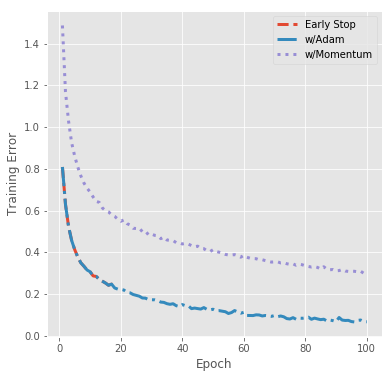

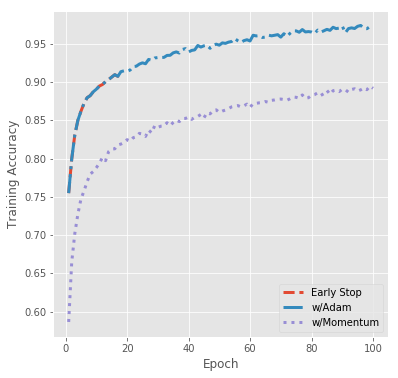

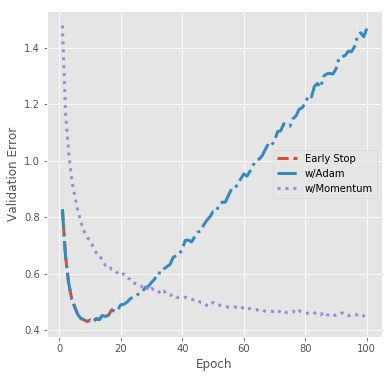

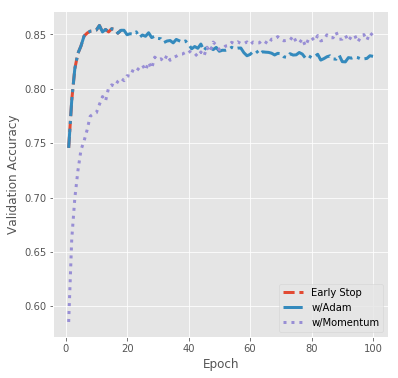

In [18]:
fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(111)
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(111)
fig3 = plt.figure(figsize=(6,6))
ax3 = fig3.add_subplot(111)
fig4 = plt.figure(figsize=(6,6))
ax4 = fig4.add_subplot(111)
stats_interval=1
labels = ['Early Stop', 'w/Adam', 'w/Momentum']
style = ['--','-.',':']
for i in range(3):
    stats = data[i]
    keys = k[i]
    #     trainig error
    ax1.plot(np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys['error(train)']],
                label=labels[i], linewidth=3, ls=style[i])
    #     training accuracy
    ax2.plot(np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys['acc(train)']],
                label=labels[i],linewidth=3 ,ls=style[i])
    #     validation error
    ax3.plot(np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys['error(valid)']],
                label=labels[i],linewidth=3,ls=style[i])
    #     validation accuracy
    ax4.plot(np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys['acc(valid)']],
                label=labels[i],linewidth=3,ls=style[i])
    

ax1.legend(loc='best')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Error')
ax2.legend(loc='best')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Training Accuracy')
ax3.legend(loc='best')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Validation Error')
ax4.legend(loc='best')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Validation Accuracy')

In [20]:
fig3.savefig('./CNN_1layer_val_err.pdf', format='pdf', bbox_inches='tight')
fig4.savefig('./CNN_1layerval_acc.pdf', format='pdf', bbox_inches='tight')

## `2 Convolution Layer`

    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=5, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer(output_shape=(12 * 12 * 5,)),
    ReluLayer(),
    ReshapeLayer(output_shape=(5,12,12)),
    ConvolutionalLayer(
        num_input_channels=5,
        num_output_channels=10,
        input_dim_1=12,
        input_dim_2=12,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=10, input_dim_1=8, input_dim_2=8, extent=2),
    ReshapeLayer(output_shape=(4 * 4 * 10,)),
    AffineLayer(4*4*10, hidden_dim=100, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim=100, output_dim=47, weights_init, biases_init)

In [12]:
model1,stats1,keys1,_ = pkl.load(open('./10_CNN/baseline/2layer/melchoir_baseline2_NOEARLYSTOP_MOMENTUMx3.pkl','rb'))
model2,stats2,keys2,_ = pkl.load(open('./10_CNN/baseline/2layer/penman_baseline2_NOEARLYSTOP_MOMENTUMx3.pkl','rb'))
model3,stats3,keys3,_ = pkl.load(open('./10_CNN/baseline/2layer/ottokar_baseline2_NOEARLYSTOP_MOMENTUMx3.pkl','rb'))

In [34]:
stats4,keys4,_,_ = pkl.load(open('./10_CNN/baseline/2layer/BASELINE2_EARLYSTOP_1.pkl','rb'))

In [41]:
stats5,keys5,_ = pkl.load(open('./10_CNN/baseline/2layer/ottokar_BASELINE_2layer_momentum.pkl','rb'))

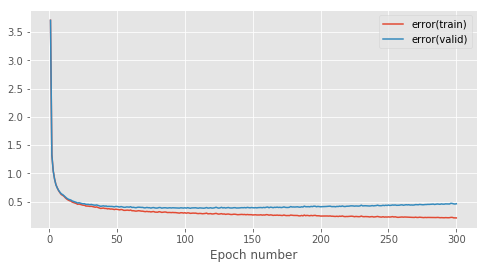

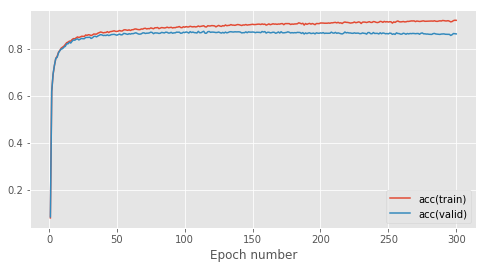

In [57]:
simplePlot(stats1,keys1)

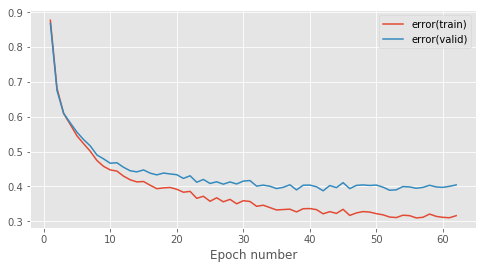

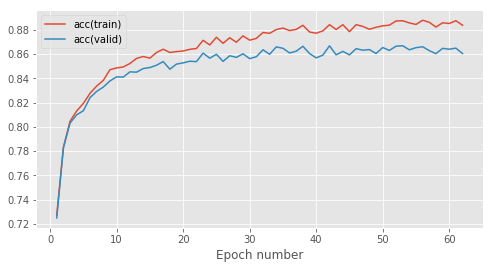

In [55]:
simplePlot(stats4,keys4)

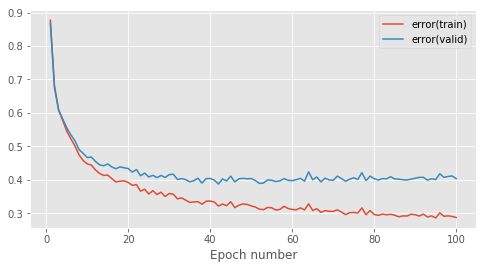

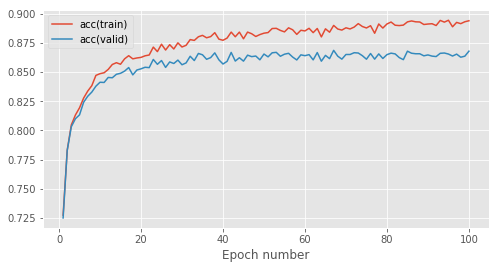

In [56]:
simplePlot(stats5,keys5)

## Combined graph

In [13]:
data = [stats1,stats2,stats3]
k = [keys1, keys2, keys3]

In [15]:
STATS_300 = {}
STATS_300['val_err'] = []
STATS_300['val_acc'] = []
STATS_300['train_err'] = []
STATS_300['train_acc'] = []
STATS_300['test_acc'] = []
for stats,keys in zip(data,k):
    STATS_300['val_err'].append(stats[1:, keys['error(valid)']])
    STATS_300['val_acc'].append(stats[1:, keys['acc(valid)']])
    STATS_300['train_err'].append(stats[1:, keys['error(train)']])
    STATS_300['train_acc'].append(stats[1:, keys['acc(train)']])
    STATS_300['test_acc'].append(stats[1:, keys['acc(test)']])


In [21]:
from mlp.helper import generate_mean_std, analyse_mean_std

In [22]:
stats_300_mu_rho = generate_mean_std({'stats_300': STATS_300})
best_epoch = analyse_mean_std(stats_300_mu_rho)

In [23]:
best_epoch

{'stats_300': {'idx': 113,
  'mean': 0.87335443037974703,
  'std': 0.0,
  'test_acc_mean': 0.86132911392405065,
  'test_acc_std': 0.0}}

Text(0,0.5,'Validation Accuracy')

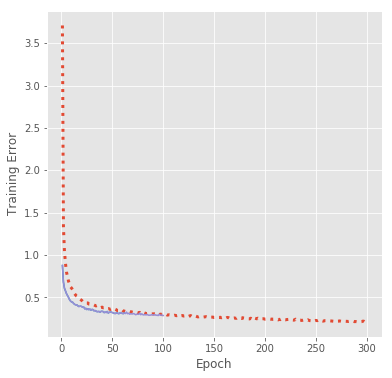

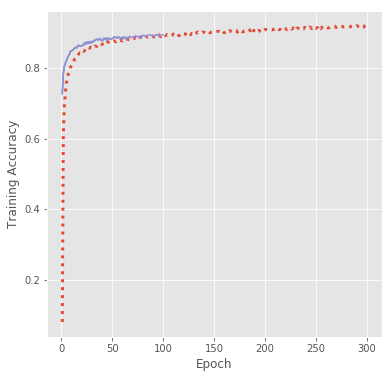

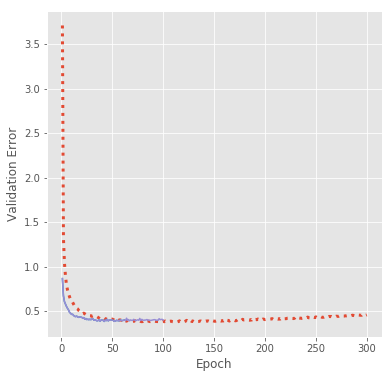

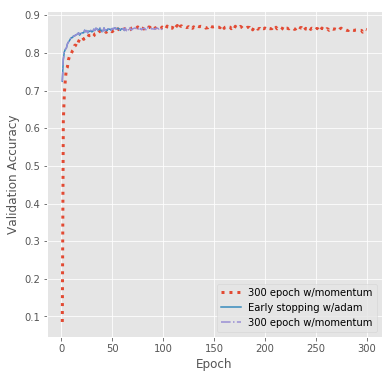

In [52]:
fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(111)
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(111)
fig3 = plt.figure(figsize=(6,6))
ax3 = fig3.add_subplot(111)
fig4 = plt.figure(figsize=(6,6))
ax4 = fig4.add_subplot(111)
stats_interval=1
labels = ['Early Stop', 'w/Adam', 'w/Momentum']
style = ['--','-.',':']
xs = np.arange(1, 301)

#     trainig error
tr_err = stats_300_mu_rho['stats_300']['train_err']
ax1.plot(xs,
            tr_err['mean'], linewidth=3, ls=':')
ax1.fill_between(xs,
                tr_err['mean'] - tr_err['std'],
                tr_err['mean'] + tr_err['std'], alpha=.5)
ax1.plot(np.arange(1,len(stats4)),
        stats4[1:,keys4['error(train)']])
ax1.plot(np.arange(1,len(stats5)),
        stats5[1:,keys5['error(train)']])

#    training accuracy
tr_acc = stats_300_mu_rho['stats_300']['train_acc']
ax2.plot(xs,
            tr_acc['mean'], linewidth=3, ls=':')
ax2.fill_between(xs,
                tr_acc['mean'] - tr_acc['std'],
                tr_acc['mean'] + tr_acc['std'], alpha=.5)
ax2.plot(np.arange(1,len(stats4)),
        stats4[1:,keys4['acc(train)']])
ax2.plot(np.arange(1,len(stats5)),
        stats5[1:,keys5['acc(train)']])

#     validation error
val_err = stats_300_mu_rho['stats_300']['val_err']
ax3.plot(xs,
            val_err['mean'], linewidth=3, ls=':')
ax3.fill_between(xs,
                val_err['mean'] - val_err['std'],
                val_err['mean'] + val_err['std'], alpha=.5, )
ax3.plot(np.arange(1,len(stats4)),
        stats4[1:,keys4['error(valid)']])
ax3.plot(np.arange(1,len(stats5)),
        stats5[1:,keys5['error(valid)']])

#     validation accuracy
val_acc = stats_300_mu_rho['stats_300']['val_acc']
ax4.plot(xs,
            val_acc['mean'], linewidth=3, ls=':', label='300 epoch w/momentum')
ax4.fill_between(xs,
                val_acc['mean'] - val_acc['std'],
                val_acc['mean'] + val_acc['std'], alpha=.5)    
ax4.plot(np.arange(1,len(stats4)),
        stats4[1:,keys4['acc(valid)']], label='Early stopping w/adam')
ax4.plot(np.arange(1,len(stats5)),
        stats5[1:,keys5['acc(valid)']], ls='-.', label='300 epoch w/momentum')


ax1.legend(loc='best')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Error')
ax2.legend(loc='best')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Training Accuracy')
ax3.legend(loc='best')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Validation Error')
ax4.legend(loc='best')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Validation Accuracy')

---
# 2Conv + 4DNN

In [5]:
layer2_4dnn_2 = pkl.load(open('./10_CNN/baseline/2layer_4DNN/gCloud_BASELINE_2layer_4DNN.1.pkl','rb'))

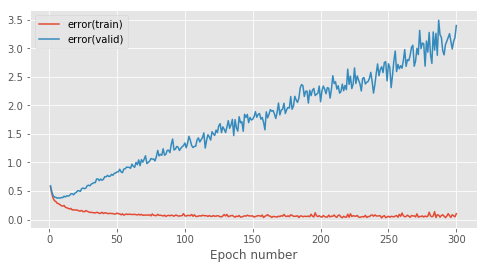

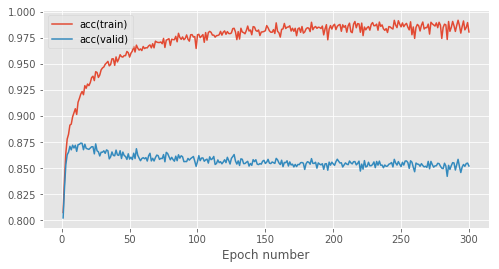

In [7]:
simplePlot(layer2_4dnn_2[0], layer2_4dnn_2[1], stats_interval=1)

---
# LeNet5 Expt

    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=20,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=20, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer(output_shape=(12 * 12 * 20,)),
    ReluLayer(),
    ReshapeLayer(output_shape=(20,12,12)),
    ConvolutionalLayer(
        num_input_channels=20,
        num_output_channels=50,
        input_dim_1=12,
        input_dim_2=12,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=50, input_dim_1=8, input_dim_2=8, extent=2),
    ReshapeLayer(output_shape=(4 * 4 * 50,)),
    ReluLayer(),
    AffineLayer(4 * 4 * 50, 400, HeNormalInit(fan_in = 4 * 4 * 50, rng=rng), biases_init),
    ReluLayer(),
    AffineLayer(400, output_dim, HeNormalInit(fan_in = 4 * 4 * 50,rng=rng), biases_init)

In [ ]:
lenet_1_he = pkl.load(open('./','rb'))
lenet_1_xav = pkl.load(open('../lenetEXPT/leNet-XAVIER_1.pkl', 'rb'))

In [ ]:
simplePlot(lenet_1_he[0], lenet_1_he[1], stats_interval=1)

In [ ]:
simplePlot(lenet_1_xav[0], lenet_1_xav[1], stats_interval=1)

# Extension to baseline

## 1 Layer with dropout

    DropoutLayer(rng=rng, incl_prob=0.8, share_across_batch=True),
    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1,
        kernels_penalty=L2Penalty(1e-5)),
    MaxPoolingLayer(
        num_input_channels=5, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer(),
    AffineLayer(12*12*5, 400,weights_init, biases_init, L2Penalty(1e-5)),
    DropoutLayer(rng=rng, incl_prob=.8, share_across_batch=True),
    ReluLayer(),
    AffineLayer(400, output_dim, weights_init, biases_init, L2Penalty(1e-5)),

## 2 Later with dropout and BN

    DropoutLayer(rng=rng, incl_prob=.8, share_across_batch=True),
    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1,
        kernels_penalty=L2Penalty(1e-6)),
    MaxPoolingLayer(
        num_input_channels=5, input_dim_1=24, input_dim_2=24, extent=2),
    ReluLayer(),
    ConvolutionalLayer(
        num_input_channels=5,
        num_output_channels=10,
        input_dim_1=12,
        input_dim_2=12,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1,
        kernels_penalty=L2Penalty(1e-6)),
    MaxPoolingLayer(
        num_input_channels=10, input_dim_1=8, input_dim_2=8, extent=2),
    ReluLayer(),
    ReshapeLayer(output_shape=(4 * 4 * 10,)), # TWO HIDDEN LAYER
    DropoutLayer(rng=rng, incl_prob=.8, share_across_batch=True),
    AffineLayerWithoutBias(4*4*10, 400, weights_init, weights_penalty=L2Penalty(1e-6)),
    BatchNormalizationLayer(input_dim=(400), rng=rng),
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=.8, share_across_batch=True),
    AffineLayerWithoutBias(400, 400, weights_init, weights_penalty=L2Penalty(1e-6)),
    BatchNormalizationLayer(input_dim=(400), rng=rng),
    ReluLayer()
    AffineLayer(400, output_dim, weights_init, biases_init,weights_penalty=L2Penalty(1e-6))